In [30]:
import pandas as pd

country_vaccinations_path = 'data/daily-covid-19-vaccine-doses-administered.csv'
daily_covid_info_path = 'data/daily_covid_info.csv'

country_vaccinations = pd.read_csv(country_vaccinations_path)
daily_covid_info = pd.read_csv(daily_covid_info_path)
country_vaccinations_us = country_vaccinations[country_vaccinations['Entity'] == 'United States']

daily_covid_info_us = daily_covid_info[daily_covid_info['Country_code'] == 'US']


In [21]:
daily_covid_info_us

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
41,2020-01-04,US,United States of America,AMR,NaN,0,NaN,0
419,2020-01-05,US,United States of America,AMR,NaN,0,NaN,0
521,2020-01-06,US,United States of America,AMR,NaN,0,NaN,0
899,2020-01-07,US,United States of America,AMR,NaN,0,NaN,0
1001,2020-01-08,US,United States of America,AMR,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
437801,2025-01-01,US,United States of America,AMR,NaN,103436829,NaN,1212060
438179,2025-01-02,US,United States of America,AMR,NaN,103436829,NaN,1212060
438281,2025-01-03,US,United States of America,AMR,NaN,103436829,NaN,1212060
438659,2025-01-04,US,United States of America,AMR,NaN,103436829,NaN,1212060


In [22]:
country_vaccinations_us

,Entity,Day,COVID-19 doses (daily)
63653,United States,2020-12-14,4848.0
63654,United States,2020-12-15,47885.0
63655,United States,2020-12-16,160151.0
63656,United States,2020-12-17,275238.0
63657,United States,2020-12-18,421048.0
...,...,...,...
64525,United States,2023-05-05,105724.0
64526,United States,2023-05-06,40672.0
64527,United States,2023-05-07,21386.0
64528,United States,2023-05-08,55634.0


In [31]:
merged_data = pd.merge(
    daily_covid_info_us,
    country_vaccinations_us,
    left_on="Date_reported",
    right_on="Day",
    how="left"
)
merged_data.rename(columns={'COVID-19 doses (daily)': 'daily_vaccinations'}, inplace=True)

In [32]:
merged_data["daily_vaccinations"] = merged_data["daily_vaccinations"].fillna(0)
merged_data["New_cases"] = merged_data["New_cases"].fillna(0)
merged_data["New_deaths"] = merged_data["New_deaths"].fillna(0)

In [33]:
merged_data_final = merged_data[["Date_reported", "New_cases", "New_deaths", "daily_vaccinations"]]
last_valid_date = "2023-05-09"
# merged_data_final.set_index("Date_reported", inplace=True)
merged_data_final = merged_data_final[merged_data_final['Date_reported'] <= last_valid_date]
merged_data_final.to_csv('data_output/usa_covid_analysis.csv', index=False)

<Figure size 0x1000 with 0 Axes>

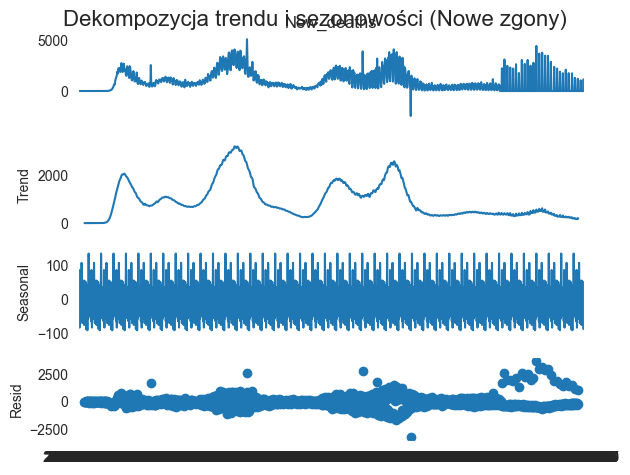

<Figure size 0x1000 with 0 Axes>

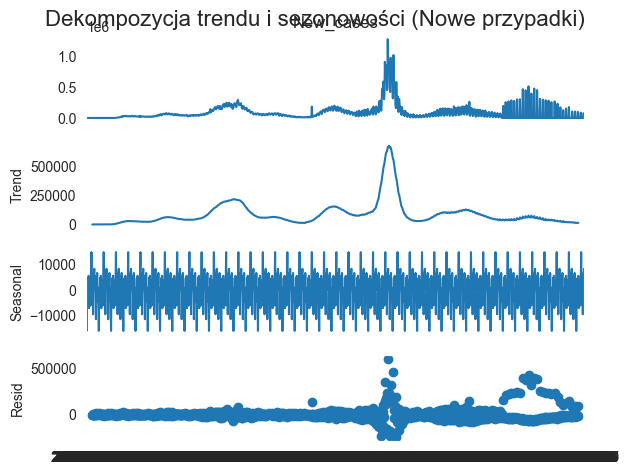

<Figure size 0x1000 with 0 Axes>

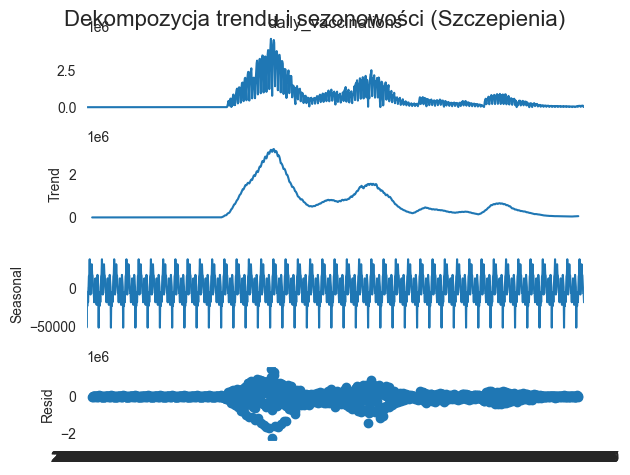

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


usaDF = pd.read_csv('data_output/usa_covid_analysis.csv')

usaDF.set_index("Date_reported", inplace=True)

decompose_result = seasonal_decompose(usaDF['New_deaths'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_result.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Nowe zgony)', fontsize=16)
plt.show()
print('=========================')

decompose_new_cases = seasonal_decompose(usaDF['New_cases'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_new_cases.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Nowe przypadki)', fontsize=16)
plt.show()

print('=========================')
decompose_result_daily_vaccinations = seasonal_decompose(usaDF['daily_vaccinations'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_result_daily_vaccinations.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Szczepienia)', fontsize=16)
plt.show()
print('=========================')

In [17]:
usaDF

,New_cases,New_deaths,daily_vaccinations
0,NaN,NaN,0.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,NaN,NaN,0.0
...,...,...,...
1824,NaN,NaN,0.0
1825,NaN,NaN,0.0
1826,NaN,NaN,0.0
1827,NaN,NaN,0.0


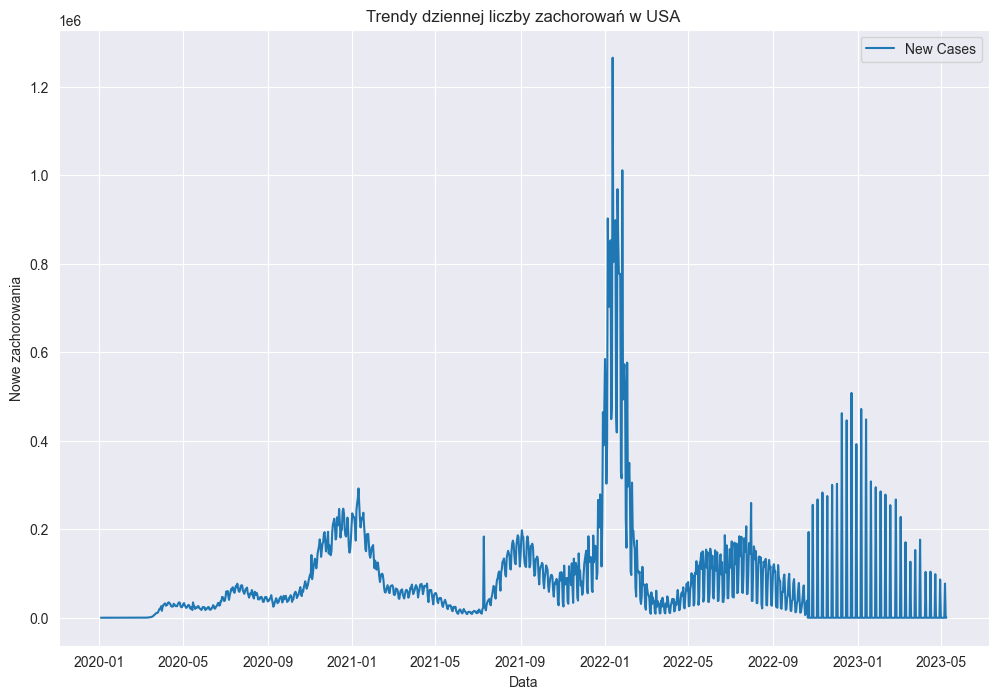

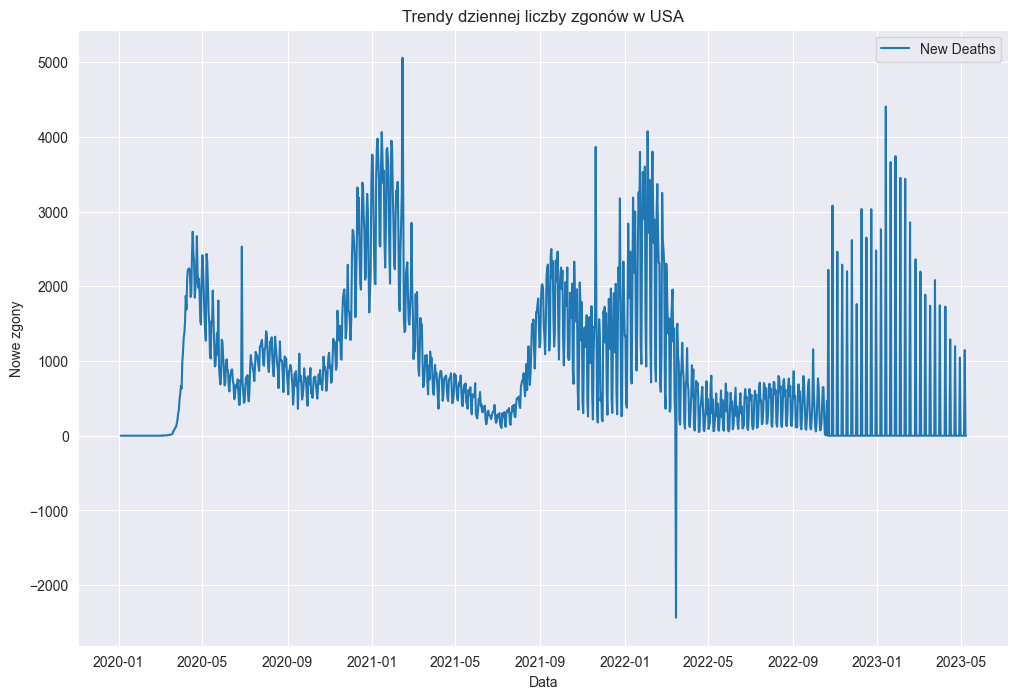

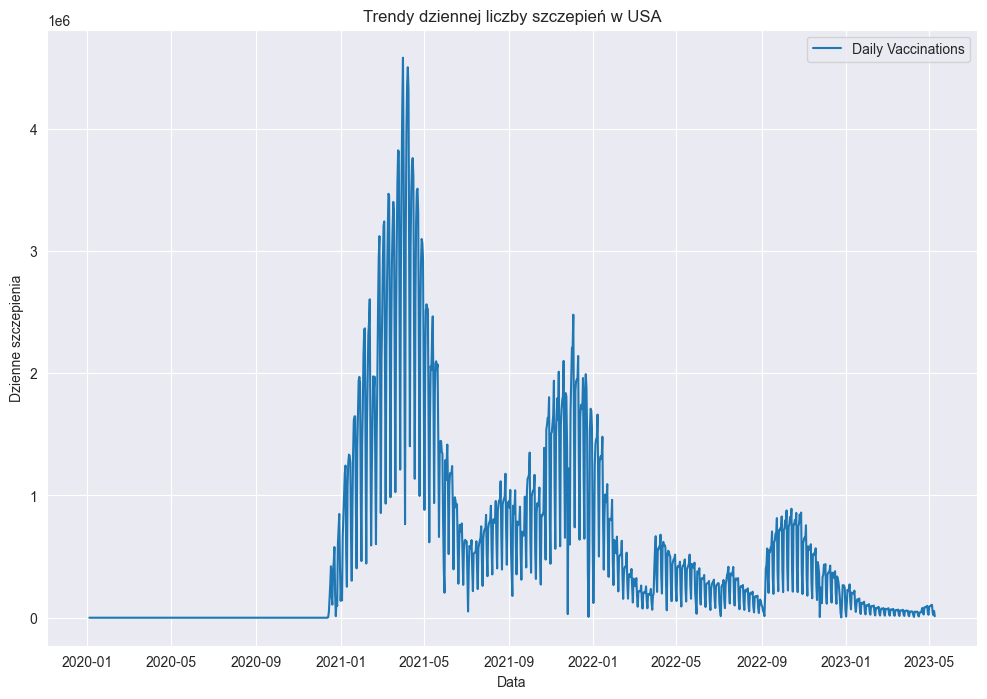

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

usaDF2 = pd.read_csv('data_output/usa_covid_analysis.csv')

usaDF2['Date_reported'] = pd.to_datetime(usaDF2['Date_reported'])

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='New_cases',
    label='New Cases'
)
plt.title('Trendy dziennej liczby zachorowań w USA')
plt.xlabel('Data')
plt.ylabel('Nowe zachorowania')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='New_deaths',
    label='New Deaths'
)
plt.title('Trendy dziennej liczby zgonów w USA')
plt.xlabel('Data')
plt.ylabel('Nowe zgony')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='daily_vaccinations',
    label='Daily Vaccinations'
)
plt.title('Trendy dziennej liczby szczepień w USA')
plt.xlabel('Data')
plt.ylabel('Dzienne szczepienia')
plt.grid(True)
plt.show()

In [46]:
usaDF

,New_cases,New_deaths,daily_vaccinations
Date_reported,,,
2020-01-04,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0
2020-01-06,0.0,0.0,0.0
2020-01-07,0.0,0.0,0.0
2020-01-08,0.0,0.0,0.0
...,...,...,...
2022-10-16,33699.0,261.0,0.0
2022-10-17,6050.0,26.0,0.0
2022-10-18,11151.0,8.0,0.0


In [40]:
usaDF2['Year'] = usaDF2['Date_reported'].dt.year

last_valid_date = "2023-12-29"
filtered_data = usaDF2[usaDF2['Date_reported'] <= last_valid_date]

mortality_data = filtered_data.groupby('Year').apply(
    lambda df: df['New_deaths'].sum() / df['New_cases'].sum() if df['New_cases'].sum() > 0 else 0
).reset_index(name='Average Mortality Rate')

print("Yearly Average Mortality Rate:")
print(mortality_data)


Yearly Average Mortality Rate:
   Year  Average Mortality Rate
0  2020                0.017980
1  2021                0.013754
2  2022                0.005741
3  2023                0.010873


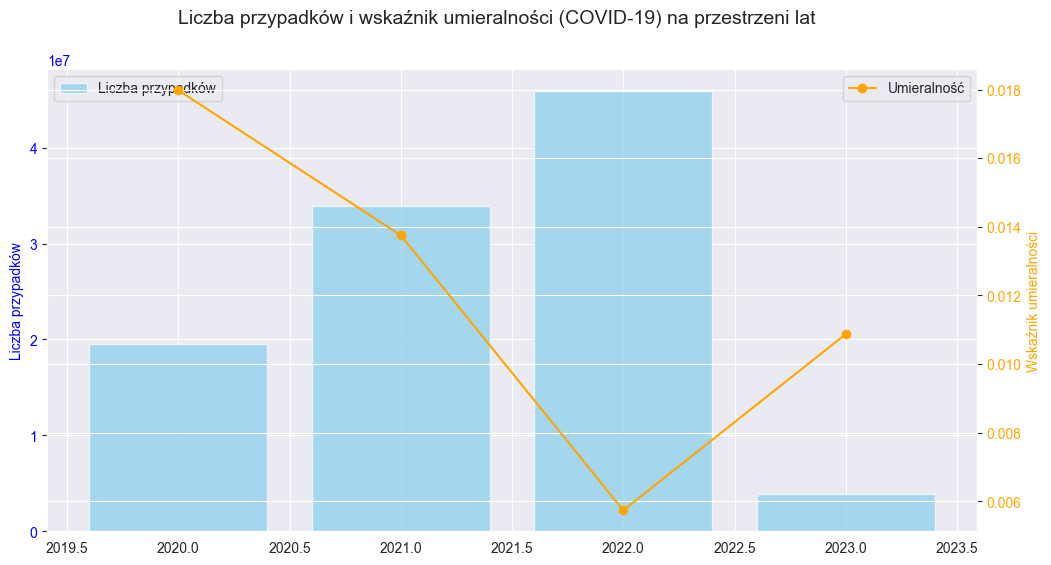

In [41]:
import matplotlib.pyplot as plt

yearly_data = filtered_data.groupby('Year').agg({
    'New_cases': 'sum',
    'New_deaths': 'sum'
}).reset_index()
yearly_data['Mortality Rate'] = yearly_data['New_deaths'] / yearly_data['New_cases']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(yearly_data['Year'], yearly_data['New_cases'], alpha=0.7, label='Liczba przypadków', color='skyblue')
ax1.set_ylabel('Liczba przypadków', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['Mortality Rate'], color='orange', marker='o', label='Umieralność')
ax2.set_ylabel('Wskaźnik umieralności', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Liczba przypadków i wskaźnik umieralności (COVID-19) na przestrzeni lat', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [43]:
from scipy.stats import ttest_ind

# Dane umieralności per przypadki dla poszczególnych lat
mortality_2020 = filtered_data[filtered_data['Year'] == 2020]['New_deaths'].sum() / filtered_data[filtered_data['Year'] == 2020]['New_cases'].sum()
mortality_2021 = filtered_data[filtered_data['Year'] == 2021]['New_deaths'].sum() / filtered_data[filtered_data['Year'] == 2021]['New_cases'].sum()
mortality_2022 = filtered_data[filtered_data['Year'] == 2022]['New_deaths'].sum() / filtered_data[filtered_data['Year'] == 2022]['New_cases'].sum()

# Tworzymy "grupy" na podstawie wartości
group_2020 = [mortality_2020] * int(filtered_data[filtered_data['Year'] == 2020]['New_cases'].sum())
group_2021 = [mortality_2021] * int(filtered_data[filtered_data['Year'] == 2021]['New_cases'].sum())
group_2022 = [mortality_2022] * int(filtered_data[filtered_data['Year'] == 2022]['New_cases'].sum())

# Test T-Studenta między latami (np. 2020 vs 2021, 2021 vs 2022)
t_stat_2020_2021, p_value_2020_2021 = ttest_ind(group_2020, group_2021, equal_var=False)
t_stat_2021_2022, p_value_2021_2022 = ttest_ind(group_2021, group_2022, equal_var=False)

# Wyniki
(t_stat_2020_2021, p_value_2020_2021), (t_stat_2021_2022, p_value_2021_2022)

((2.814392871544341e+16, 0.0), (9.697508536480706e+16, 0.0))

In [69]:
filtered_data2

,Date_reported,New_cases,New_deaths,daily_vaccinations,Year,Month
0,2020-01-04,0.0,0.0,0.0,2020,2020-01
1,2020-01-05,0.0,0.0,0.0,2020,2020-01
2,2020-01-06,0.0,0.0,0.0,2020,2020-01
3,2020-01-07,0.0,0.0,0.0,2020,2020-01
4,2020-01-08,0.0,0.0,0.0,2020,2020-01
...,...,...,...,...,...,...
1016,2022-10-16,33699.0,261.0,0.0,2022,2022-10
1017,2022-10-17,6050.0,26.0,0.0,2022,2022-10
1018,2022-10-18,11151.0,8.0,0.0,2022,2022-10
1019,2022-10-19,33860.0,234.0,0.0,2022,2022-10


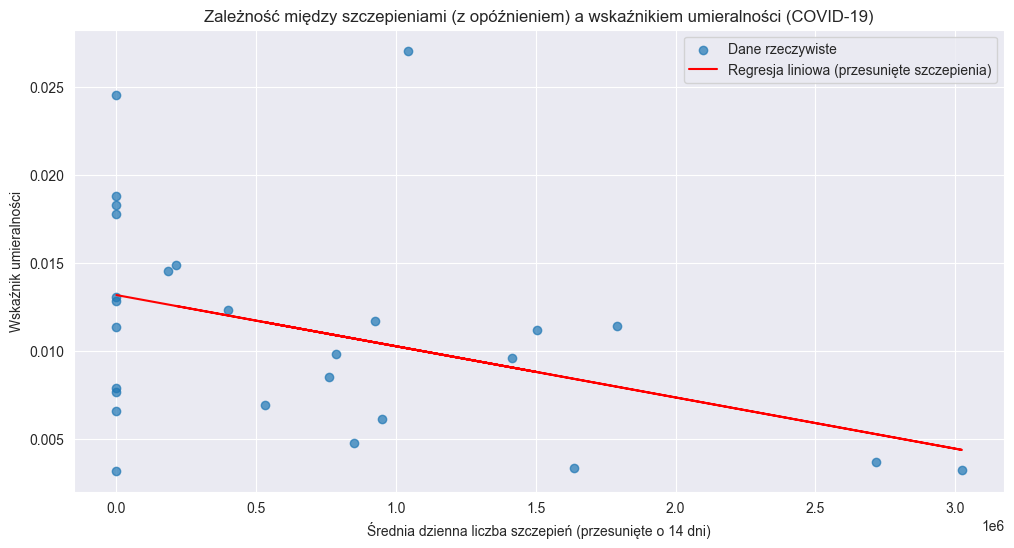

Nachylenie (coef_): [-2.90884467e-09]
Przecięcie (intercept_): 0.013158730813341298


In [44]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

filtered_data2 = filtered_data.copy()

# Przygotowanie danych: agregacja miesięczna dla daily_vaccinations i umieralności
filtered_data2['Month'] = filtered_data2['Date_reported'].dt.to_period('M')
monthly_data = filtered_data2.groupby('Month').agg({
    'daily_vaccinations': 'mean',
    'New_deaths': 'sum',
    'New_cases': 'sum'
}).reset_index()

# Dodanie wskaźnika umieralności
monthly_data['Mortality Rate'] = monthly_data['New_deaths'] / monthly_data['New_cases']

# Przesunięcie szczepień o 14 dni w przód
monthly_data['Shifted Vaccinations'] = monthly_data['daily_vaccinations'].shift(14)

# Usunięcie braków danych
monthly_data = monthly_data.dropna()

# Regresja liniowa: przesunięte szczepienia vs Mortality Rate
X_shifted = monthly_data[['Shifted Vaccinations']].values
y_shifted = monthly_data['Mortality Rate'].values

# Tworzenie modelu regresji
model_shifted = LinearRegression()
model_shifted.fit(X_shifted, y_shifted)
y_shifted_pred = model_shifted.predict(X_shifted)

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.scatter(monthly_data['Shifted Vaccinations'], monthly_data['Mortality Rate'], alpha=0.7, label='Dane rzeczywiste')
plt.plot(monthly_data['Shifted Vaccinations'], y_shifted_pred, color='red', label='Regresja liniowa (przesunięte szczepienia)')
plt.xlabel('Średnia dzienna liczba szczepień (przesunięte o 14 dni)')
plt.ylabel('Wskaźnik umieralności')
plt.title('Zależność między szczepieniami (z opóźnieniem) a wskaźnikiem umieralności (COVID-19)')
plt.legend()
plt.grid(True)
plt.show()

# Wyniki regresji po przesunięciu
print("Nachylenie (coef_):", model_shifted.coef_)
print("Przecięcie (intercept_):", model_shifted.intercept_)


Zależność między szczepieniami a wskaźnikiem umieralności:
Wydaje się, że istnieje negatywna zależność (im większa liczba szczepień, tym niższy wskaźnik umieralności), co jest sugerowane przez spadkowy trend regresji liniowej.

Rozrzut danych:
Punkty danych są dość rozproszone, co oznacza, że istnieje spora zmienność, której model liniowy nie wyjaśnia. Wskazuje to na to, że regresja liniowa może nie być najlepszym modelem do uchwycenia tej zależności.

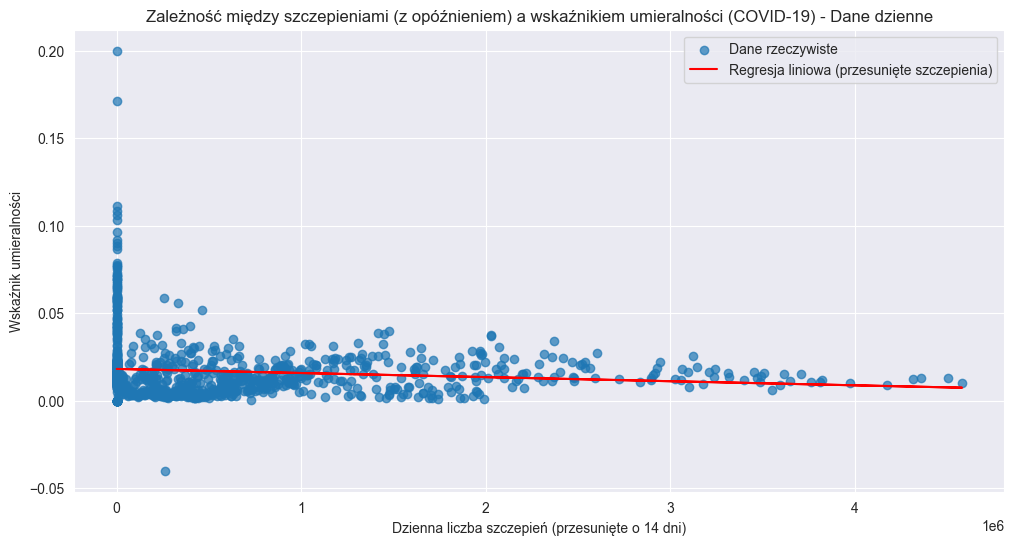

(array([-2.34137828e-09]), 0.018196923301996834)

In [46]:
# Agregacja dzienna
daily_data = filtered_data.groupby('Date_reported').agg({
    'daily_vaccinations': 'sum',
    'New_deaths': 'sum',
    'New_cases': 'sum'
}).reset_index()

# Dodanie wskaźnika umieralności
daily_data['Mortality Rate'] = daily_data['New_deaths'] / daily_data['New_cases']

# Przesunięcie liczby szczepień o 14 dni w przód
daily_data['Shifted Vaccinations'] = daily_data['daily_vaccinations'].shift(14)

# Usunięcie braków danych powstałych przez przesunięcie
daily_data = daily_data.dropna()

# Regresja liniowa: przesunięte szczepienia vs Mortality Rate
X_daily_shifted = daily_data[['Shifted Vaccinations']].values
y_daily_shifted = daily_data['Mortality Rate'].values

# Tworzenie modelu regresji
daily_model_shifted = LinearRegression()
daily_model_shifted.fit(X_daily_shifted, y_daily_shifted)
y_daily_shifted_pred = daily_model_shifted.predict(X_daily_shifted)

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['Shifted Vaccinations'], daily_data['Mortality Rate'], alpha=0.7, label='Dane rzeczywiste')
plt.plot(daily_data['Shifted Vaccinations'], y_daily_shifted_pred, color='red', label='Regresja liniowa (przesunięte szczepienia)')
plt.xlabel('Dzienna liczba szczepień (przesunięte o 14 dni)')
plt.ylabel('Wskaźnik umieralności')
plt.title('Zależność między szczepieniami (z opóźnieniem) a wskaźnikiem umieralności (COVID-19) - Dane dzienne')
plt.legend()
plt.grid(True)
plt.show()

# Wyniki regresji dziennej
daily_model_shifted.coef_, daily_model_shifted.intercept_

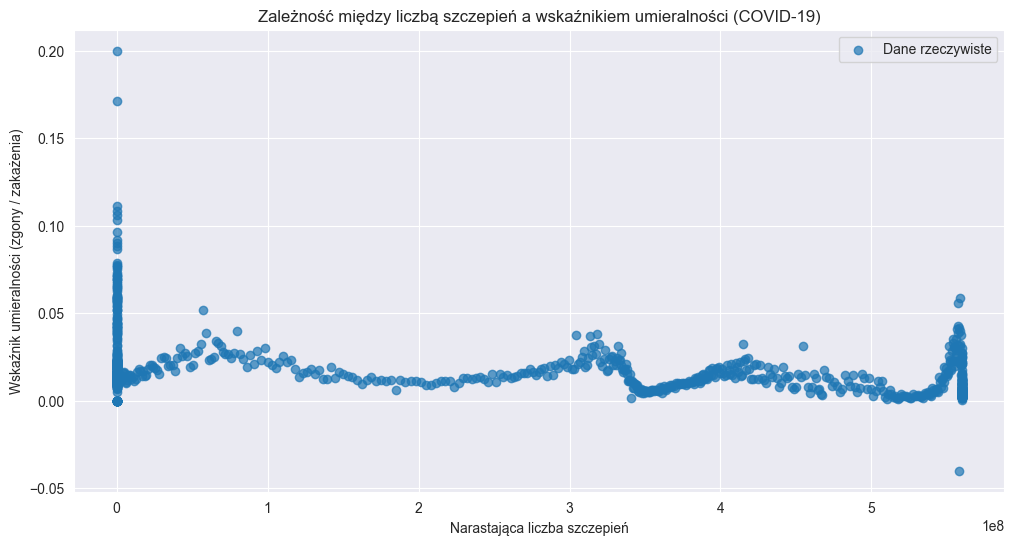

In [71]:
# Dodanie kolumny z narastającą sumą szczepień
daily_data['Cumulative Vaccinations'] = daily_data['daily_vaccinations'].cumsum()

# Usunięcie dni bez danych o przypadkach, aby uniknąć dzielenia przez zero
filtered_daily_data = daily_data[daily_data['New_cases'] > 0]

# Obliczenie wskaźnika umieralności (zgony / zakażenia)
filtered_daily_data['Mortality Rate'] = filtered_daily_data['New_deaths'] / filtered_daily_data['New_cases']

# Wizualizacja: Wskaźnik umieralności vs Suma szczepień
plt.figure(figsize=(12, 6))
plt.scatter(
    filtered_daily_data['Cumulative Vaccinations'],
    filtered_daily_data['Mortality Rate'],
    alpha=0.7,
    label='Dane rzeczywiste'
)
plt.xlabel('Narastająca liczba szczepień')
plt.ylabel('Wskaźnik umieralności (zgony / zakażenia)')
plt.title('Zależność między liczbą szczepień a wskaźnikiem umieralności (COVID-19)')
plt.grid(True)
plt.legend()
plt.show()

Interpretacja wykresu:
Początkowa faza szczepień:

W początkowych dniach pandemii, gdy liczba szczepień była bliska zeru, wskaźnik umieralności był wyższy. Może to wynikać z:
Braku odporności populacyjnej.
Słabo rozwiniętego leczenia i obciążenia systemu ochrony zdrowia.
Wzrost liczby szczepień:

Wraz z narastającą liczbą szczepień wskaźnik umieralności wyraźnie maleje.
Sugeruje to, że szczepienia mogły przyczynić się do zmniejszenia liczby ciężkich przypadków prowadzących do zgonów.
Stabilizacja wskaźnika umieralności:

Przy wyższej liczbie szczepień wskaźnik umieralności wydaje się stabilizować na niskim poziomie.
To może oznaczać, że osiągnięto efekt odporności populacyjnej, a zgony wynikają głównie z innych czynników (np. grupy ryzyka, opóźniony dostęp do szczepień).
Nagły wzrost na końcu wykresu:

Może być wynikiem specyficznych zdarzeń (np. pojawienie się nowego wariantu wirusa, nierówności w dostępie do szczepień w poszczególnych regionach).
Warto dokładniej zbadać te okresy.

In [47]:
usaDF2

,Date_reported,New_cases,New_deaths,daily_vaccinations,Year
0,2020-01-04,0.0,0.0,0.0,2020
1,2020-01-05,0.0,0.0,0.0,2020
2,2020-01-06,0.0,0.0,0.0,2020
3,2020-01-07,0.0,0.0,0.0,2020
4,2020-01-08,0.0,0.0,0.0,2020
...,...,...,...,...,...
1217,2023-05-05,0.0,0.0,105724.0,2023
1218,2023-05-06,0.0,0.0,40672.0,2023
1219,2023-05-07,77165.0,1146.0,21386.0,2023
1220,2023-05-08,0.0,0.0,55634.0,2023


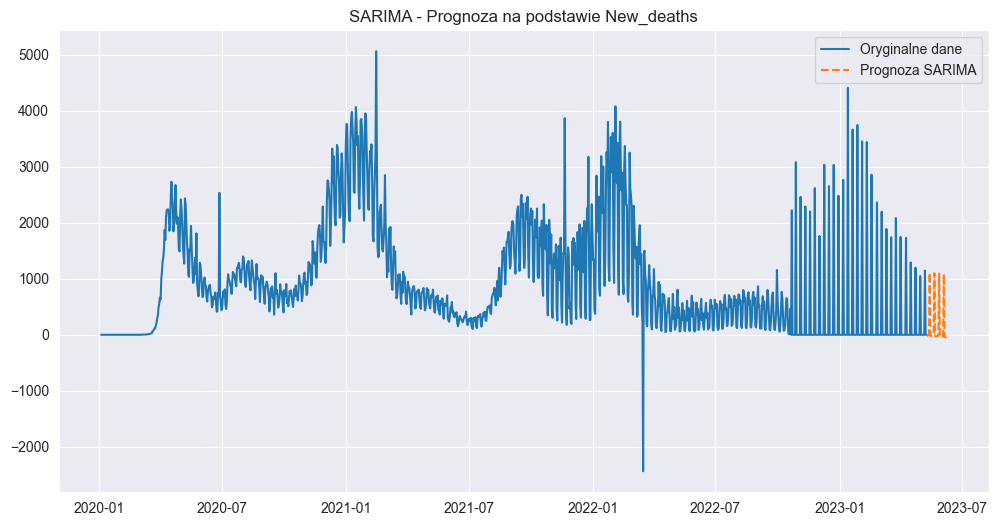

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

usaDF3 =  usaDF2

time_series = usaDF3.groupby('Date_reported')['New_deaths'].sum()

# Uzupełnienie braków zerami
time_series = time_series.asfreq('D').fillna(0)

# Test stacjonarności (ADF Test)
adf_result = adfuller(time_series)

# Dekompozycja trendu, sezonowości i reszt
decomposition = seasonal_decompose(time_series, model='additive', period=7)  # Założenie: sezonowość tygodniowa

# Dopasowanie modelu SARIMA (na początek losowe parametry)
sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

# Prognozy na 30 dni do przodu
forecast = sarima_fit.get_forecast(steps=30).predicted_mean

# Wyświetlenie wyników
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Oryginalne dane')
plt.plot(forecast, label='Prognoza SARIMA', linestyle='--')
plt.legend()
plt.title('SARIMA - Prognoza na podstawie New_deaths')
plt.show()

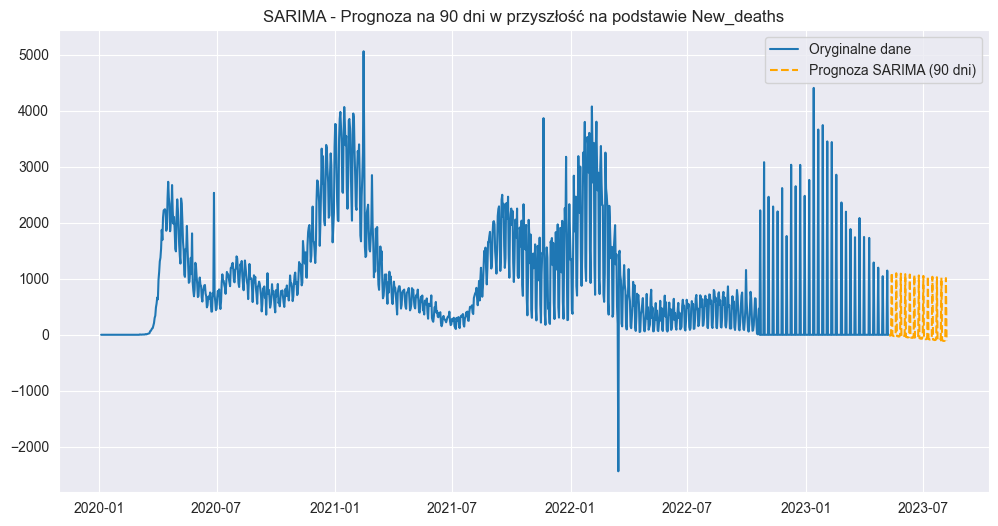

In [53]:
extended_forecast = sarima_fit.get_forecast(steps=90).predicted_mean

# Aktualizacja wykresu
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Oryginalne dane')
plt.plot(extended_forecast, label='Prognoza SARIMA (90 dni)', linestyle='--', color='orange')
plt.legend()
plt.title('SARIMA - Prognoza na 90 dni w przyszłość na podstawie New_deaths')
plt.show()

In [85]:

daily_covid_info_path = 'data/daily_covid_info.csv'

daily_covid_info = pd.read_csv(daily_covid_info_path)

daily_covid_info_us = daily_covid_info[daily_covid_info['Country_code'] == 'US']

daily_covid_info_us['New_deaths'].fillna(0, inplace=True)
daily_covid_info_us

C:\Users\dariu\AppData\Local\Temp\ipykernel_6984\2382403495.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_covid_info_us['New_deaths'].fillna(0, inplace=True)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
41,2020-01-04,US,United States of America,AMR,NaN,0,0.0,0
419,2020-01-05,US,United States of America,AMR,NaN,0,0.0,0
521,2020-01-06,US,United States of America,AMR,NaN,0,0.0,0
899,2020-01-07,US,United States of America,AMR,NaN,0,0.0,0
1001,2020-01-08,US,United States of America,AMR,NaN,0,0.0,0
...,...,...,...,...,...,...,...,...
437801,2025-01-01,US,United States of America,AMR,NaN,103436829,0.0,1212060
438179,2025-01-02,US,United States of America,AMR,NaN,103436829,0.0,1212060
438281,2025-01-03,US,United States of America,AMR,NaN,103436829,0.0,1212060
438659,2025-01-04,US,United States of America,AMR,NaN,103436829,0.0,1212060


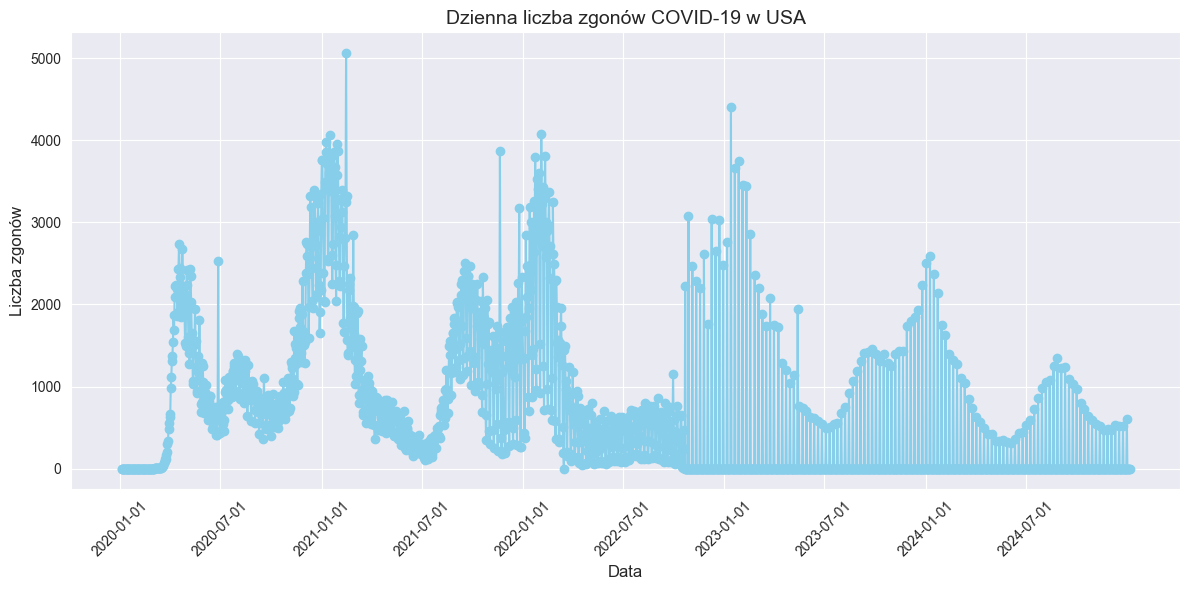

In [89]:
daily_covid_info_us.loc[:, "New_deaths"] = daily_covid_info_us["New_deaths"].clip(lower=0)

daily_covid_info_us_sorted = daily_covid_info_us.sort_values(by="Date_reported")

plt.figure(figsize=(12, 6))
plt.plot(daily_covid_info_us_sorted["Date_reported"], daily_covid_info_us_sorted["New_deaths"],
         marker="o", linestyle="-", color="skyblue")
plt.title("Dzienna liczba zgonów COVID-19 w USA", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Liczba zgonów", fontsize=12)

plt.xticks(pd.date_range(start=daily_covid_info_us_sorted["Date_reported"].min(),
                         end=daily_covid_info_us_sorted["Date_reported"].max(),
                         freq="6M").strftime("%Y-%m"), rotation=45, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()